In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [3]:
# TODO
df=pd.read_csv("avocado.csv", index_col=None)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [4]:
# TODO
print(df.shape)
print(df.isna().sum())

(18249, 13)
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [5]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
corr_mat=df.corr()
corr_mat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


#### Drop the unnecessary columns, if any. 

In [8]:
# TODO
#as we already have date column I don't think that year is necessary 
df.drop(['year'], axis=1, inplace=True)


#### Choose the 'AveragePrice' column as your target (y) variable.

In [9]:
# TODO
y=df['AveragePrice']
X=df.columns.difference(['AveragePrice'])

#### Plot the relationship of each of the numerical features with the target variable

In [10]:
numericals=['AveragePrice','Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A497F24D48>,
      dtype=object)

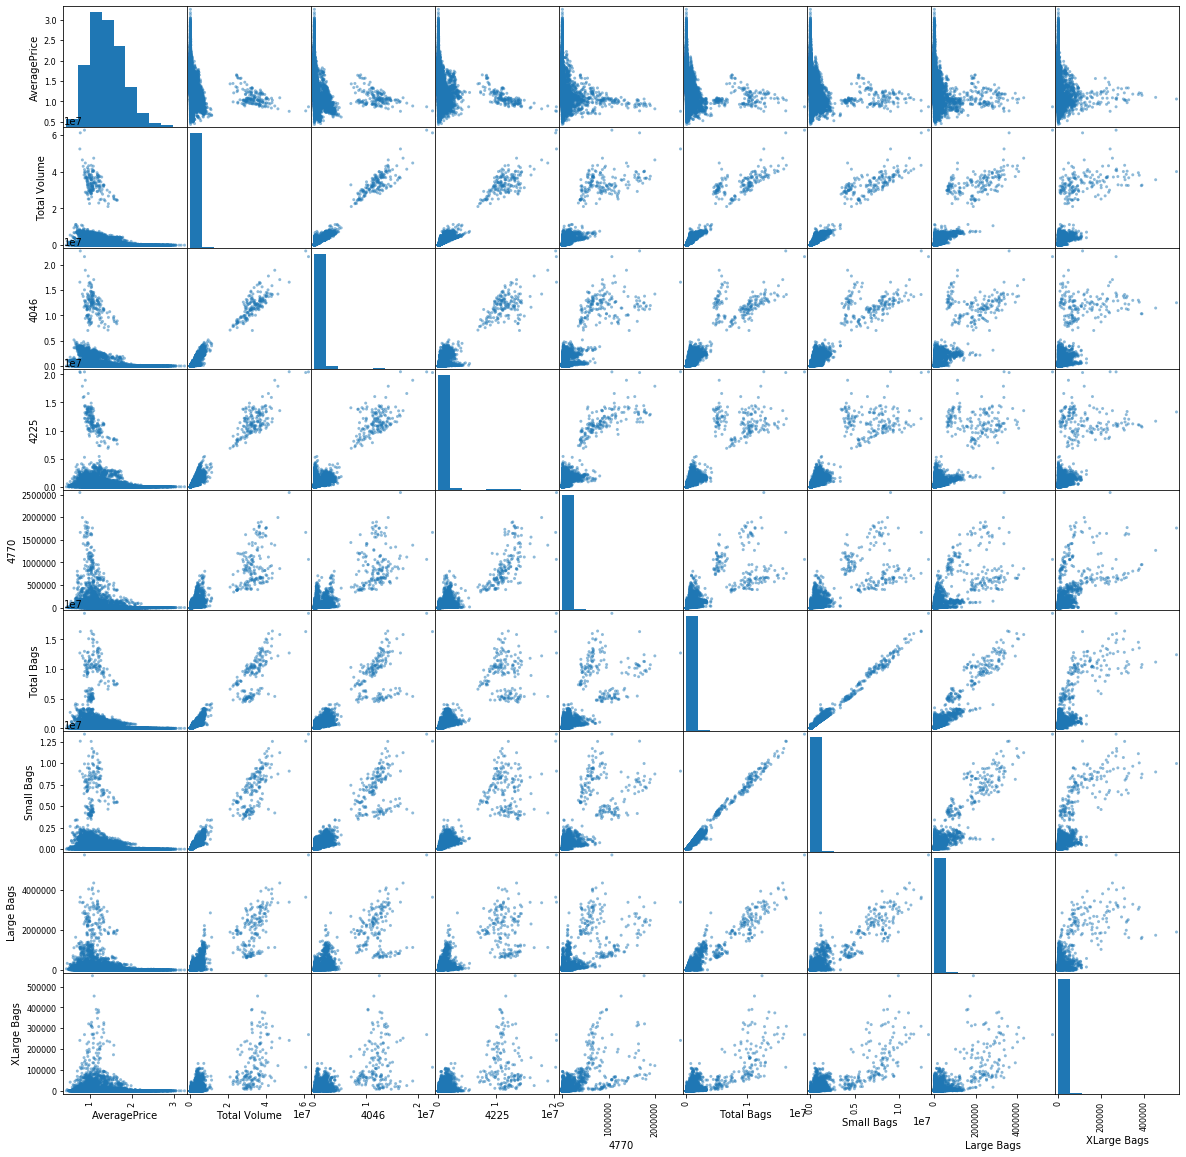

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numericals], figsize = (20,20))

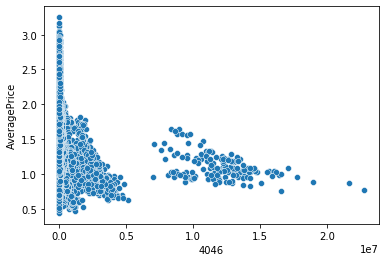

In [12]:
sns.scatterplot(x=df['4046'], y=df['AveragePrice'])

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [13]:
# TODO
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['type']]).toarray())
df = df.join(enc_df)
df.rename(columns={0:'conventional', 1:'organic'}, inplace=True)
df.drop(['type'], axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,conventional,organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,1.0,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,1.0,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,1.0,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,1.0,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,WestTexNewMexico,0.0,1.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,WestTexNewMexico,0.0,1.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,WestTexNewMexico,0.0,1.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,WestTexNewMexico,0.0,1.0


In [14]:
len(df['region'].unique())
#as region has 54 unique values one hot encoder will add additional 53 features and lead to high memory consumption
#we can use label encoding instead

54

In [15]:
label_encoder = LabelEncoder()
# Encode labels in column 'species'.
df['region']= label_encoder.fit_transform(df['region'])

In [16]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [17]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,conventional,organic
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1.0,0.0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,1.0,0.0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1.0,0.0
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,1.0,0.0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,736729,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,53,0.0,1.0
18245,736722,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,53,0.0,1.0
18246,736715,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,53,0.0,1.0
18247,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,53,0.0,1.0


#### Devide data into Train and Test sets with the ratio 80:20.

In [18]:
# TODO
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['AveragePrice'])],df['AveragePrice'], test_size=0.2, random_state=11)

In [19]:
#model scores
def summary(regr, yTest, y_pred):
    print('Coefficients: \n', regr.coef_)
    print('Mean absolute error: %.2f'
          % mean_absolute_error(yTest, y_pred))

    print('Mean squared error: %.2f'
          % mean_squared_error(yTest, y_pred))

    print('Root mean squared error: %.2f'
          % np.sqrt(mean_squared_error(yTest, y_pred)))

    print('R-squared: %.2f'
          % r2_score(yTest, y_pred))

#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [20]:
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain, xTrain)
est2 = est.fit()
print(est2.summary())


# TODO
#here we can see p-values of our features

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     954.7
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:13:27   Log-Likelihood:                -3503.6
No. Observations:               14599   AIC:                             7031.
Df Residuals:                   14587   BIC:                             7122.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
4046           7.87e-05   4.75e-05      1.657   

In [21]:
def forward_selection(data, target, n):
    initial_features = data.drop(target.name, axis=1).columns.tolist()
    best_features = []
    while (len(best_features)<5):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()

        best_features.append(new_pval.idxmin())

    return best_features


In [22]:
best=forward_selection(df,df['AveragePrice'] , 5)
print(best)


C:\Users\annab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['organic', 'Date', 'conventional', '4046', '4225']


In [23]:
#Training a model according to forward selection
regr1 = linear_model.LinearRegression()

# Train the model using the training data
regr1.fit(xTrain[best], yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
regr1.coef_, regr1.intercept_

(array([ 2.44638751e-01,  1.69653294e-04, -2.44638751e-01, -9.61478192e-08,
         8.27672009e-08]),
 -123.48781950316541)

In [25]:
y_pred = regr1.predict(xTest[best])

In [26]:
summary(regr1, yTest, y_pred)

Coefficients: 
 [ 2.44638751e-01  1.69653294e-04 -2.44638751e-01 -9.61478192e-08
  8.27672009e-08]
Mean absolute error: 0.23
Mean squared error: 0.09
Root mean squared error: 0.31
R-squared: 0.42


#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

In [27]:
# TODO
def backward_selection(data, target, n):
    initial_features = data.drop(target.name, axis=1).columns.tolist()
    best_features = initial_features
    while (len(best_features)>5):


        new_pval = sm.OLS(target, sm.add_constant(data[best_features])).fit().pvalues[1:]  

        max_p_value = new_pval.max()

        best_features.remove(new_pval.idxmax())

    return best_features

In [34]:
best_=backward_selection(df,df['AveragePrice'] , 5)

In [35]:
#Training a model according to forward selection
regr2 = linear_model.LinearRegression()

# Train the model using the training data
regr2.fit(xTrain[best_], yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
regr2.coef_, regr2.intercept_

(array([ 1.80624109e-04, -5.81593505e-08,  1.51411487e-07, -2.44628795e-01,
         2.44628795e-01]),
 -131.56339563251927)

In [37]:
y_pred = regr2.predict(xTest[best_])

In [38]:
summary(regr2, yTest, y_pred)

Coefficients: 
 [ 1.80624109e-04 -5.81593505e-08  1.51411487e-07 -2.44628795e-01
  2.44628795e-01]
Mean absolute error: 0.24
Mean squared error: 0.09
Root mean squared error: 0.31
R-squared: 0.41


#### Choose only the features for further training which occur in both previous results.

In [42]:
# TODO
features=['organic', 'Date', 'conventional', '4225']

#### Implement the function `fit_linear_regression` that takes a matrix $x$ and a vector $y$, and returns a numpy array , where the first element $\beta_0$ is the intercept of the line, and remainings are the coefficients of a features, like $\beta_1$, $\beta_2$, etc.

In [44]:
import numpy as np

def fit_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    # TODO
    mul=np.dot(data_vector.T, data_vector)
    matinv=np.linalg.inv(mul)
    mul1=np.dot(matinv, data_vector.T)
    B1=np.dot(mul1, response_vector)
    
    B0=(response_vector-np.dot(data_vector, B1)).sum()/len(data_vector)
    
    B=[]
    B.append(B0)
    B.append(B1)
    B=np.array(B)
    return B

# fit_linear_regression(X_train, y_train)

In [45]:
fit_linear_regression(xTrain[features], yTrain)

array([-5.543873077269704e-11,
       array([-1.21077632e+02,  1.66712692e-04, -1.21569599e+02, -9.36175099e-09])],
      dtype=object)

#### Now fit the data to LinearRegression model of sklearn.linear_model.

In [46]:
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain[features], yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = regr.predict(xTest[features])

In [48]:
summary(regr, yTest, y_pred)


Coefficients: 
 [ 2.45983491e-01  1.66712692e-04 -2.45983491e-01 -9.36175099e-09]
Mean absolute error: 0.24
Mean squared error: 0.10
Root mean squared error: 0.31
R-squared: 0.40


#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [73]:
# TODO
def mean_squared_error(y_pred, y_real):
    sum=0
    for i in range(len(y_pred)):
        sum+=pow((y_pred[i]-y_real[i]), 2)

    sum/=len(y_pred)
    return sum


In [74]:
y=np.array(yTest)
mean_squared_error(y_pred, y)

0.09509864999747443

In [78]:
def mean_absolute_error(y_pred, y_real):
    sum=0
    for i in range(len(y_pred)):
        sum+=abs(y_pred[i]-y_real[i])

    sum/=len(y_pred)
    return sum

In [79]:
mean_absolute_error(y_pred, y)

0.23750125709306924

In [80]:
def r2_score(y_pred, y_real):
    mean=0
    for i in y_real:
        mean+=i
    mean/=len(y_real)
    
    RSS = 0
    for i in range(len(y_real)):
        RSS+=pow((y_pred[i]-y_real[i]), 2)
    TSS = 0
    for i in range(len(y_real)):
        TSS+=pow((y_real[i]-mean), 2)
    return (1-RSS/TSS)

In [81]:
r2_score(y_pred, y)

0.4045144387964066

#### Compare the resulting scores of your functions and scores of corresponding sklearn functions. They should be the same.

In [86]:
#the scores were compaired above 
#compare the scores of sklearn regression model with fit_linear_regression(X_train, y_train) model
B=fit_linear_regression(xTrain[features], yTrain)
pred=np.dot(xTest[features], B[1])+B[0]


In [94]:
print(B[0], "\n", B[1])

-5.543873077269704e-11 
 [-1.21077632e+02  1.66712692e-04 -1.21569599e+02 -9.36175099e-09]


In [91]:
print(mean_squared_error(pred, y))
print(mean_absolute_error(pred, y))
print(r2_score(pred, y))

0.09509864999655686
0.237501257090249
0.4045144388021521
